## Đồ án thực hành
MSSV: 20120497\
Họ tên: Nguyễn Quang Huy


# 1. Chuẩn bị dữ liệu

## 1.1. Tập hợp dữ liệu

In [108]:
#Import các thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [109]:
#Đọc file Data_Train_p1 vào dataframe
df_p1 = pd.read_excel("Data_Train_p1.xlsx", header=0, index_col=None)
df_p1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
8810,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
8811,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
8812,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
8813,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [110]:
#Đọc file Data_Train_p2 vào dataframe
df_p2 = pd.read_excel("Data_Train_p2.xlsx", header=0, index_col=None)
df_p2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,15/05/2019,Delhi,Cochin,DEL → HYD → COK,06:50,16:10,9h 20m,1 stop,No info,6442
1,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,08:25,16:20,7h 55m,1 stop,In-flight meal not included,10844
2,Jet Airways,18/05/2019,Mumbai,Hyderabad,BOM → HYD,10:20,11:50,1h 30m,non-stop,No info,5678
3,IndiGo,12/04/2019,Banglore,Delhi,BLR → DEL,23:30,02:20 13 Apr,2h 50m,non-stop,No info,6906
4,SpiceJet,21/05/2019,Chennai,Kolkata,MAA → CCU,09:45,12:00,2h 15m,non-stop,No check-in baggage included,3543


In [111]:
#2. Merge hai data frame
df=pd.concat([df_p1,df_p2])
copy=df.copy()
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## 1.2. Mô tả dữ liệu



*   Kiểm tra số dòng, số cột và kiểu dữ liệu



In [112]:
#Xem thông tin của data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10684 entries, 0 to 1868
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10684 non-null  object
 1   Date_of_Journey  10684 non-null  object
 2   Source           10684 non-null  object
 3   Destination      10684 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10684 non-null  object
 6   Arrival_Time     10684 non-null  object
 7   Duration         10684 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10684 non-null  object
 10  Price            10684 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.6+ KB


Dữ liệu có 10684 dòng, 11 cột\
Các thuộc tính Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops và Additional_Info có kiểu dữ liệu trong dataframe là object (chuỗi) hoặc  còn Price là int64 (số nguyên).

In [113]:
#Mô tả thông tin cột Price
df['Price'].describe()

count    10684.000000
mean      9087.545582
std       4611.411873
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

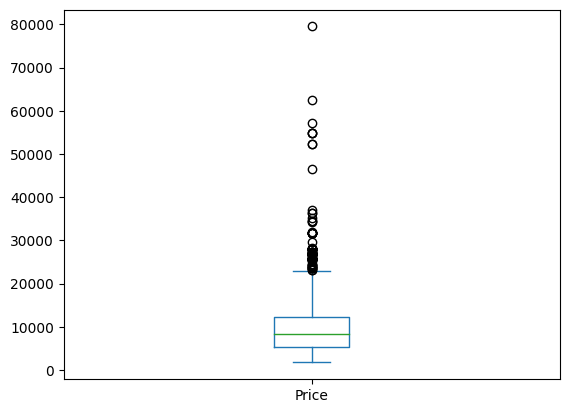

In [114]:
df.plot(y=["Price"],kind='box');

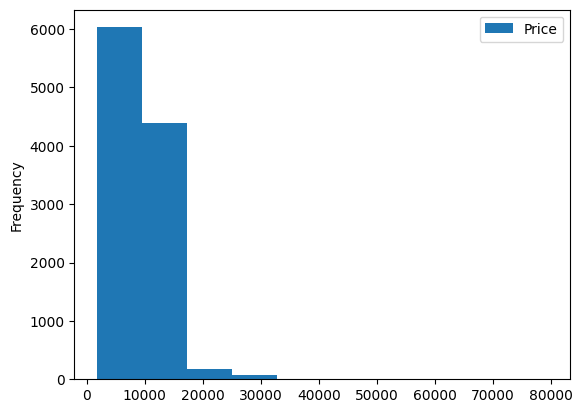

In [115]:
df.plot(y=["Price"],kind='hist');



*   Kiểm tra các giá trị khác nhau trong các cột phân loại



## 1.3. Làm sạch dữ liệu

### 1.3.1. Xử lý dữ liệu thiếu

In [139]:
df.isna().sum().sort_values(ascending=False)

Route              1
Total_Stops        1
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64

In [140]:
for column in df.columns:
  percentage=df[column].isnull().mean()
  print(f"{column}: {round(percentage*100,2)}%")

Airline: 0.0%
Date_of_Journey: 0.0%
Source: 0.0%
Destination: 0.0%
Route: 0.01%
Dep_Time: 0.0%
Arrival_Time: 0.0%
Duration: 0.0%
Total_Stops: 0.01%
Additional_Info: 0.0%
Price: 0.0%


In [141]:
df.dropna(inplace=True)
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64



### 1.3.2. Xử lý outlier



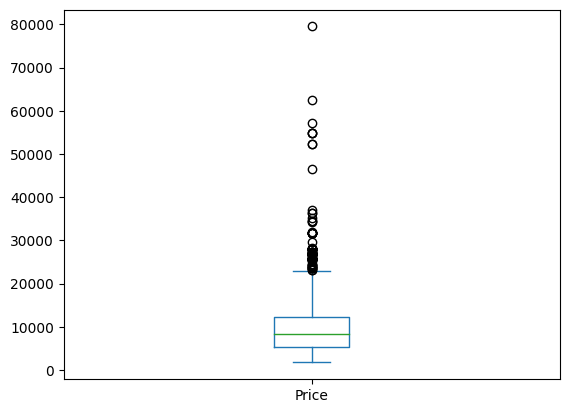

In [142]:
df.plot(y=["Price"],kind='box');

### 1.3.3. Xử lý dữ liệu trùng

In [143]:
print("Số dòng bị trùng:",df.duplicated().sum())

Số dòng bị trùng: 221


In [144]:
df.drop_duplicates(inplace=True)
print("Số dòng bị trùng:",df.duplicated().sum())

Số dòng bị trùng: 0


## 1.4. Chuyển đổi dữ liệu


In [138]:
df=copy.copy()
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### 1.4.1. Data Standardization



*   Đổi Duration thành số phút



In [145]:
df["Duration"]=df["Duration"].str.replace('h','*60').str.replace(' ','+').str.replace('m','')
df["Duration"]=df["Duration"].apply(eval)
df["Duration"]=pd.to_numeric(df['Duration'])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302




*   Tách Date_of_Journey thành các cột ngày tháng năm



In [146]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y")
df['Date_of_Journey_day']= df['Date_of_Journey'].dt.day
df['Date_of_Journey_month_name']= df['Date_of_Journey'].dt.month_name()
df['Date_of_Journey_month']= df['Date_of_Journey'].dt.month
df['Date_of_Journey_year']= df['Date_of_Journey'].dt.year
df['Date_of_Journey_weekday']= df['Date_of_Journey'].dt.day_name()
df.drop('Date_of_Journey', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month_name,Date_of_Journey_month,Date_of_Journey_year,Date_of_Journey_weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,March,3,2019,Sunday
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,May,5,2019,Wednesday
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,June,6,2019,Sunday
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,May,5,2019,Sunday
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,March,3,2019,Friday



*   Tách Dep_Time thành các cột giờ và phút


In [147]:
df["Dep_Time"]=pd.to_datetime(df["Dep_Time"],format="%H:%M")
df["Dep_Time_hour"]=df["Dep_Time"].dt.hour
df["Dep_Time_minute"]=df["Dep_Time"].dt.minute
df.drop('Dep_Time', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month_name,Date_of_Journey_month,Date_of_Journey_year,Date_of_Journey_weekday,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,170,non-stop,No info,3897,24,March,3,2019,Sunday,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,445,2 stops,No info,7662,1,May,5,2019,Wednesday,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,1140,2 stops,No info,13882,9,June,6,2019,Sunday,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,325,1 stop,No info,6218,12,May,5,2019,Sunday,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,285,1 stop,No info,13302,1,March,3,2019,Friday,16,50


*   Tách Arrival_Time thành các cột giờ, phút, ngày, tháng


In [148]:
def add_day_month(row): #Thêm ngày và tháng nếu như không có trong dòng
  if len(row["Arrival_Time"])==5:
    month_name=datetime.datetime.strptime(str(row["Date_of_Journey_month"]), "%m").strftime("%b")
    return row["Arrival_Time"]+' '+str(row["Date_of_Journey_day"])+' '+month_name
  return row["Arrival_Time"]

df['Arrival_Time'] = df.apply(add_day_month, axis=1)
df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"],format="%H:%M %d %b")
df["Arrival_Time_hour"]=df["Arrival_Time"].dt.hour
df["Arrival_Time_minute"]=df["Arrival_Time"].dt.minute
df["Arrival_Time_day"]=df["Arrival_Time"].dt.day
df["Arrival_Time_month"]=df["Arrival_Time"].dt.month
df.drop('Arrival_Time', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month_name,Date_of_Journey_month,Date_of_Journey_year,Date_of_Journey_weekday,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Time_day,Arrival_Time_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,March,3,2019,Sunday,22,20,1,10,22,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,May,5,2019,Wednesday,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,June,6,2019,Sunday,9,25,4,25,10,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,May,5,2019,Sunday,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,March,3,2019,Friday,16,50,21,35,1,3


*   Sửa cột Total_Stops thành số


In [149]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [150]:
df['Total_Stops']=df['Total_Stops'].apply(lambda x: int(x.replace('non','0')[0]))
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month_name,Date_of_Journey_month,Date_of_Journey_year,Date_of_Journey_weekday,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Time_day,Arrival_Time_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,March,3,2019,Sunday,22,20,1,10,22,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,May,5,2019,Wednesday,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,June,6,2019,Sunday,9,25,4,25,10,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,May,5,2019,Sunday,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,March,3,2019,Friday,16,50,21,35,1,3


# 2. Phân tích khám phá Dữ liệu

## 2.1. Giá vé theo thời điểm

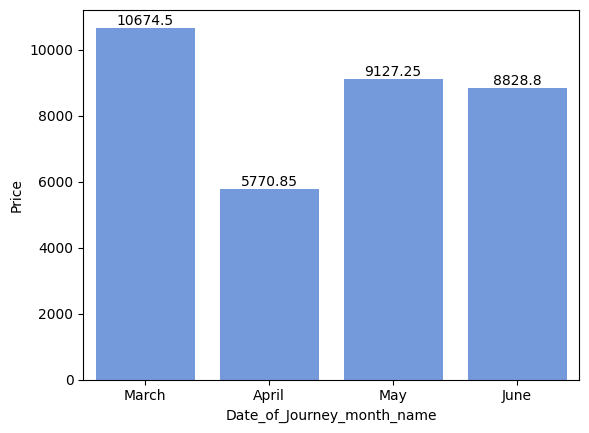

In [102]:
month_order = ['March','April','May','June']
ax=sns.barplot(data=df, x="Date_of_Journey_month_name", y="Price",order=month_order,color="cornflowerblue",errorbar=None)
ax.bar_label(ax.containers[0])
plt.show()

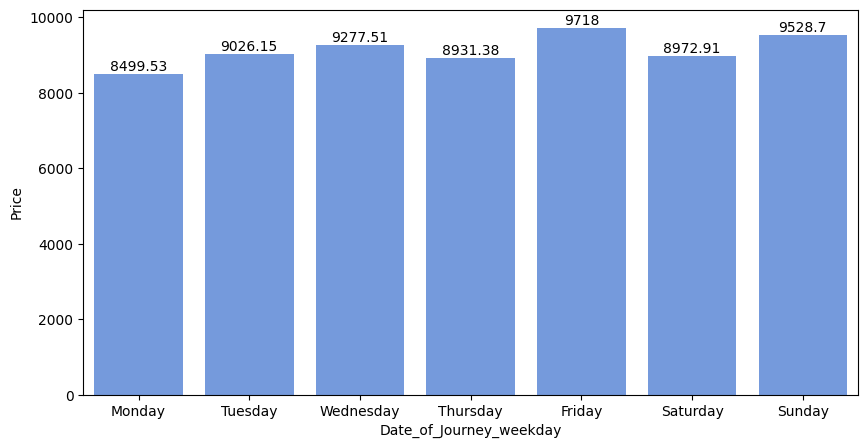

In [103]:
weekday_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
plt.figure(figsize=(10,5))
ax=sns.barplot(data=df,x='Date_of_Journey_weekday',y='Price',order=weekday_order,color="cornflowerblue",errorbar=None)
ax.bar_label(ax.containers[0])
plt.show()

## 2.2. So sánh tỷ lệ các chuyến bay thẳng và trung chuyển

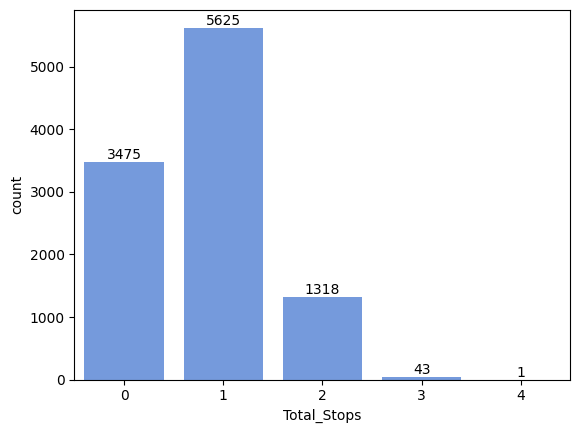

In [151]:
ax=sns.countplot(data=df,x='Total_Stops',color="cornflowerblue")
ax.bar_label(ax.containers[0])
plt.show()

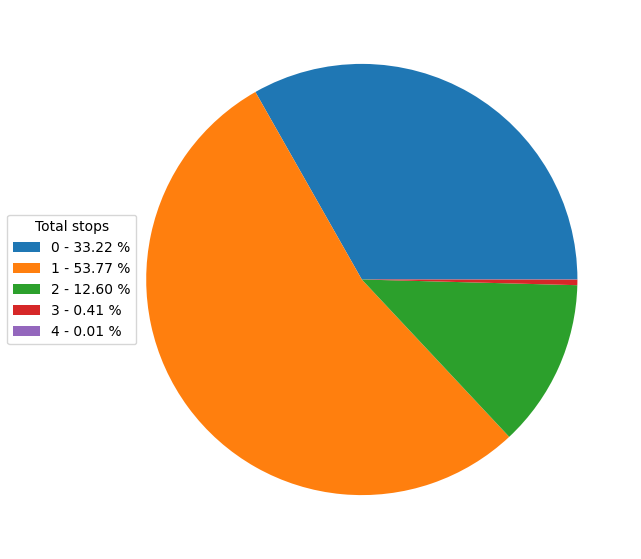

In [179]:
ax=plt.figure(figsize =(7, 7))
total_counts=df["Total_Stops"].value_counts().sort_index()
percentages=total_counts*100/total_counts.sum()

labels = ['{0} - {1:1.2f} %'.format(total_stop,percentage) for total_stop,percentage in percentages.items()]
plt.pie(percentages);
ax.legend(labels=labels,loc='center left',title="Total stops")
plt.show()

## 2.3. Số lượng chuyến bay theo thành phố

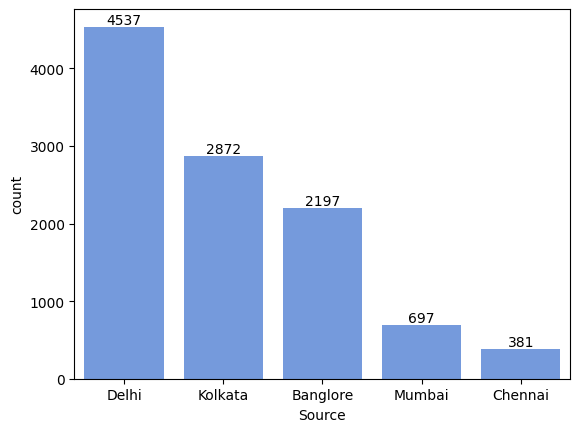

In [ ]:
ax=sns.countplot(data=df,x='Source',color="cornflowerblue",order = df['Source'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

## 2.4. Số lượng chuyến bay theo hãng bay

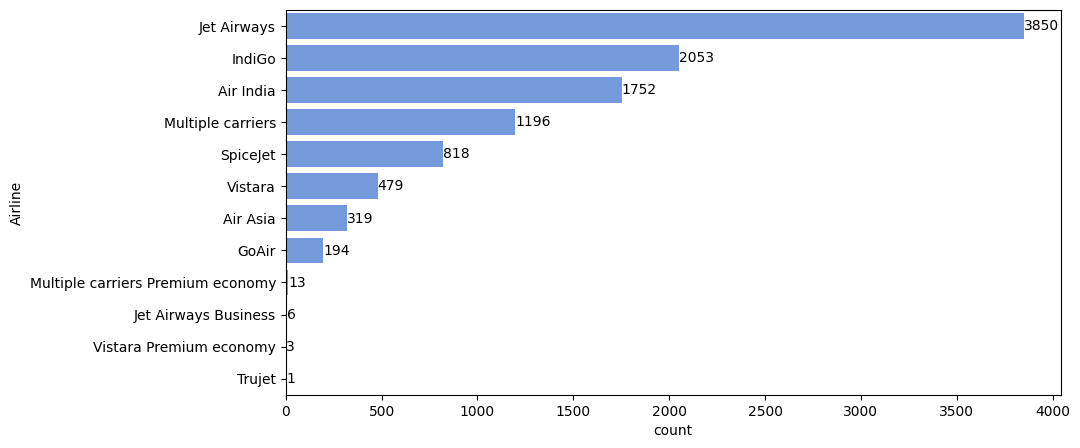

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,y='Airline',color="cornflowerblue",order = df['Airline'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

## 2.5. Số lượng chuyến bay theo tháng

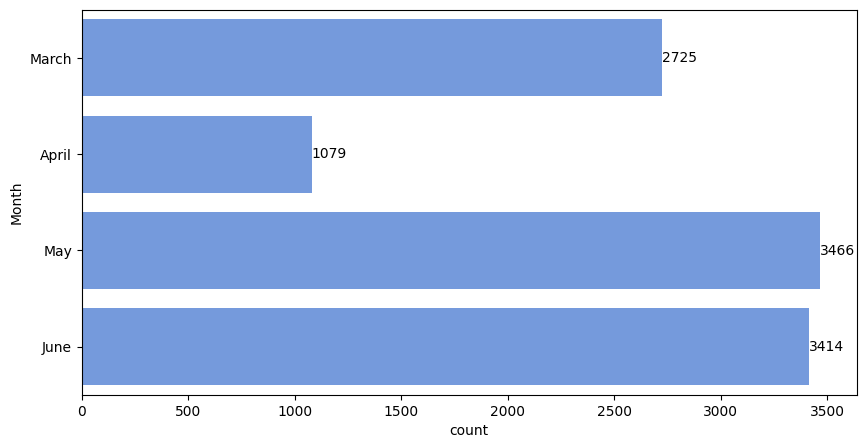

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,y='Date_of_Journey_month_name',color="cornflowerblue",order=month_order)
ax.bar_label(ax.containers[0])
ax.set(ylabel='Month')
plt.show()

## 2.6. Sự thay đổi của giá vé theo hãng hàng không

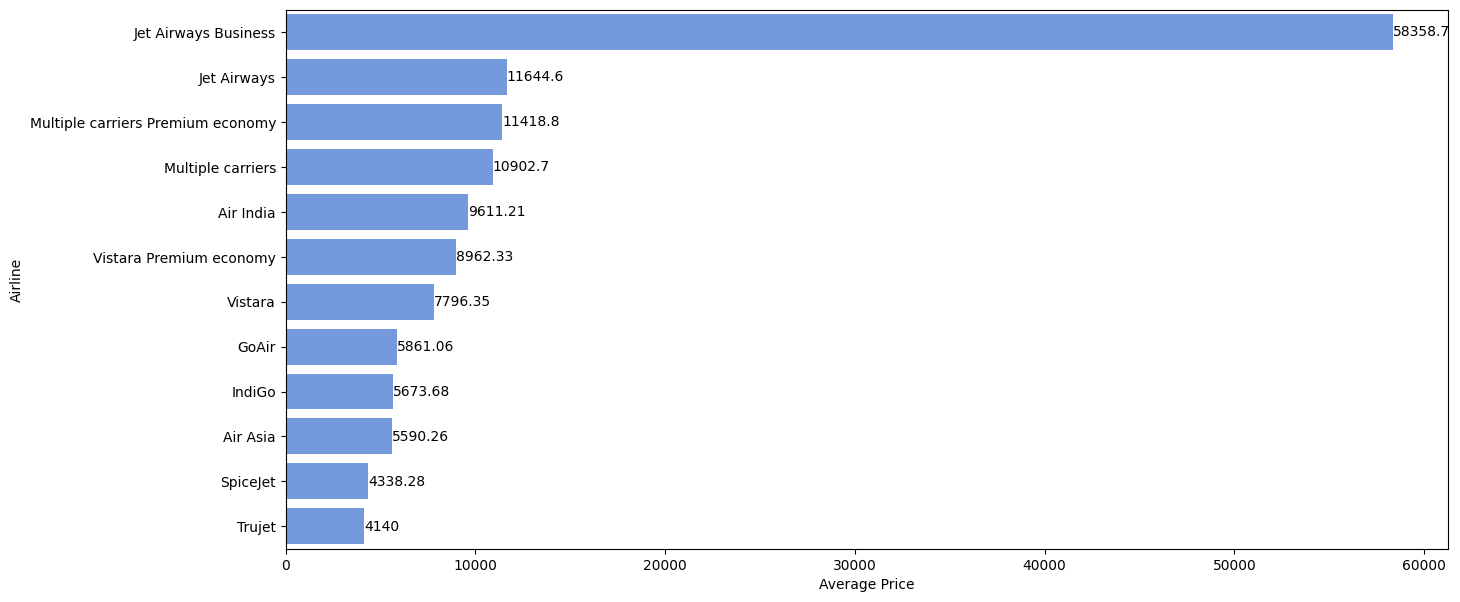

In [ ]:
plt.figure(figsize=(15,7))
order=df.groupby('Airline')['Price'].mean().sort_values(ascending=False).index
ax=sns.barplot(data=df,y='Airline',x="Price",color="cornflowerblue", errorbar=None,order=order)
ax.bar_label(ax.containers[0])
ax.set(xlabel='Average Price')
plt.show()

## 2.8. Sự thay đổi của giá vé theo thời gian đi và đến

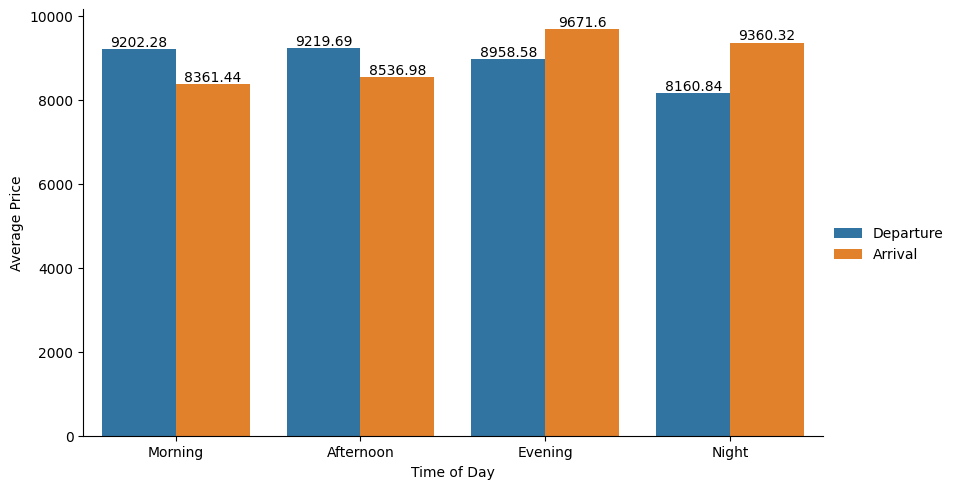

In [ ]:
#Lấy thời gian trung bình chia theo các mốc trong ngày
#Departure
morning_departure_average_price=df[(df['Dep_Time_hour']>=5)&(df['Dep_Time_hour']<=11)]['Price'].mean()
afternoon_departure_average_price=df[(df['Dep_Time_hour']>=12)&(df['Dep_Time_hour']<=17)]['Price'].mean()
evening_departure_average_price=df[(df['Dep_Time_hour']>=18)&(df['Dep_Time_hour']<=22)]['Price'].mean()
night_departure_average_price=df[(df['Dep_Time_hour']>=23)|(df['Dep_Time_hour']<=4)]['Price'].mean()
#Arrival
morning_arrival_average_price=df[(df['Arrival_Time_hour']>=5)&(df['Arrival_Time_hour']<=11)]['Price'].mean()
afternoon_arrival_average_price=df[(df['Arrival_Time_hour']>=12)&(df['Arrival_Time_hour']<=17)]['Price'].mean()
evening_arrival_average_price=df[(df['Arrival_Time_hour']>=18)&(df['Arrival_Time_hour']<=22)]['Price'].mean()
night_arrival_average_price=df[(df['Arrival_Time_hour']>=23)|(df['Arrival_Time_hour']<=4)]['Price'].mean()

#Tạo dữ lei65u
data = {'Time_of_day': ['Morning','Morning', 'Afternoon','Afternoon', 'Evening','Evening', 'Night','Night'],
        'Flight_status': ['Departure','Arrival','Departure','Arrival','Departure','Arrival','Departure','Arrival'],
        'Average_Price': [morning_departure_average_price, morning_arrival_average_price,afternoon_departure_average_price, afternoon_arrival_average_price,
                          evening_departure_average_price,evening_arrival_average_price, night_departure_average_price,night_arrival_average_price]}

g=sns.catplot(data=pd.DataFrame(data),x='Time_of_day',y='Average_Price',hue='Flight_status',kind='bar',aspect=1.7)
ax = g.facet_axis(0, 0)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set(ylabel='Average Price')
ax.set(xlabel='Time of Day')
g.legend.set_title("")
plt.show()

## 2.9. Sự thay đổi của giá vé theo địa điểm nguồn và đích

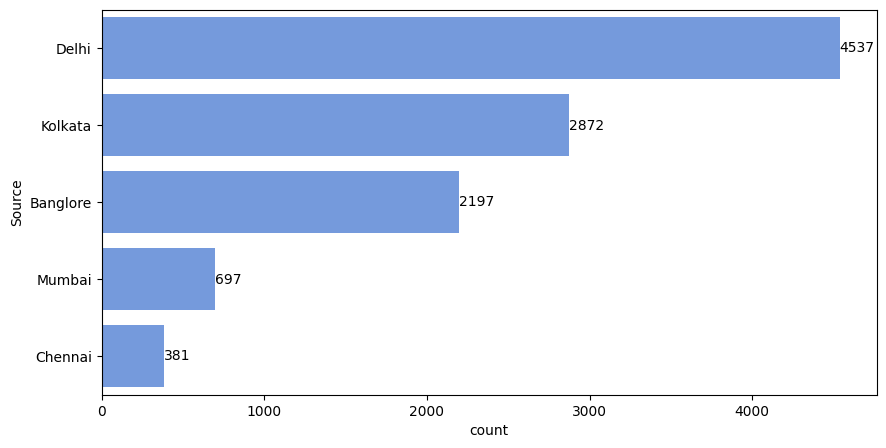

In [104]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,y='Source',color="cornflowerblue",order = df['Source'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

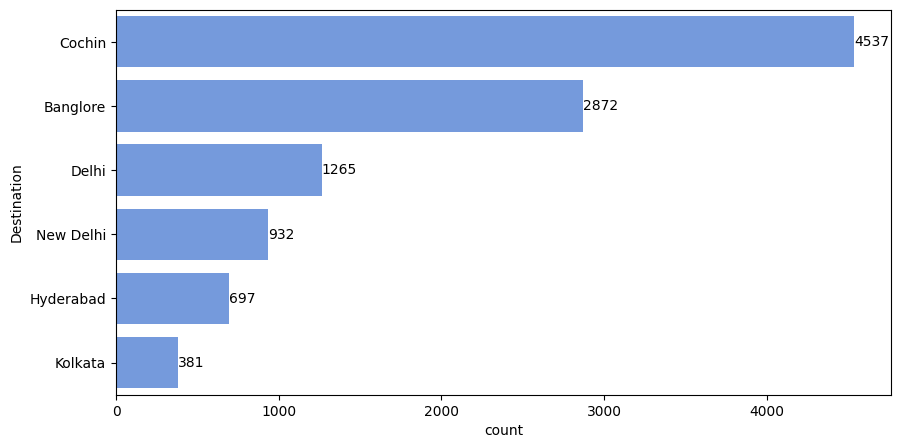

In [106]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,y='Destination',color="cornflowerblue",order = df['Destination'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

### 3. Vẽ biểu đồ phân bố dữ liệu